# PCA (Principal Component Analysis)

https://miro.medium.com/max/1400/1*HWQvXoyc8nxR-zyW2Q6KYA.jpeg 


# PCA 用於數據可視化
許多機器學習應用都會希望能夠可視化數據，可視化 2 或 3 維數據並不是那麼具有挑戰性。然而，4維的就沒辦法了。這邊我們使用 PCA 將4維數據減少為2或3維，以便於可以繪製並更好地理解數據。

Iris 數據集是 scikit-learn 附帶的數據集之一，不需要從某些外部網站下載任何文件。下面的代碼將加載 iris 數據集。


In [ ]:
import pandas as pd
url = "https://drive.google.com/uc?id=1jZdkMEzXLJ4IOpdMNdHGNWMNOi6tZ7sr&export=download "
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
print(df.dtypes)

sepal length     int64
sepal width      int64
petal length     int64
petal width      int64
target          object
dtype: object


In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5,5,0,0,Asia
1,5,0,0,0,Asia
2,5,0,0,0,Asia
3,5,0,0,0,Asia
4,5,0,0,0,Asia


###  標準化數據

PCA 會受到比例影響
所以在跑 PCA 之前要對數據進行比例縮放。


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x[:5]


array([[5, 5, 0, 0],
       [5, 0, 0, 0],
       [5, 0, 0, 0],
       [5, 0, 0, 0],
       [5, 0, 0, 0]])

使用StandardScaler可將數據集標準化為單位尺度（均值 = 0 標準差 = 1），
這樣是許多機器學習算法的最佳性能的比例。

In [ ]:
x = StandardScaler().fit_transform(x)
x[:5]

array([[-0.1627661 , -0.13564733, -0.17808319, -0.19181224],
       [-0.1627661 , -0.13570712, -0.17808319, -0.19181224],
       [-0.1627661 , -0.13570712, -0.17808319, -0.19181224],
       [-0.1627661 , -0.13570712, -0.17808319, -0.19181224],
       [-0.1627661 , -0.13570712, -0.17808319, -0.19181224]])

### PCA 投影到 2D
原始數據有 4 欄位
（萼片長度、萼片寬度、花瓣長度和花瓣寬度）。
 ['sepal length', 'sepal width', 'petal length', 'petal width']

下面程式將 4 維的數據投影為 2 維。
在降維之後，通常沒有為每個主成分分配特定的含義。
新組件只是變化的兩個主要維度。
隨便取名字['principal component 1', 'principal component 2']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head()

,principal component 1,principal component 2
0,-0.333859,0.043887
1,-0.333888,0.043853
2,-0.333888,0.043853
3,-0.333888,0.043853
4,-0.333888,0.043853


In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [ ]:
finalDf.head()

,principal component 1,principal component 2,target
0,-0.333859,0.043887,Asia
1,-0.333888,0.043853,Asia
2,-0.333888,0.043853,Asia
3,-0.333888,0.043853,Asia
4,-0.333888,0.043853,Asia


In [ ]:
import matplotlib.pyplot as plt

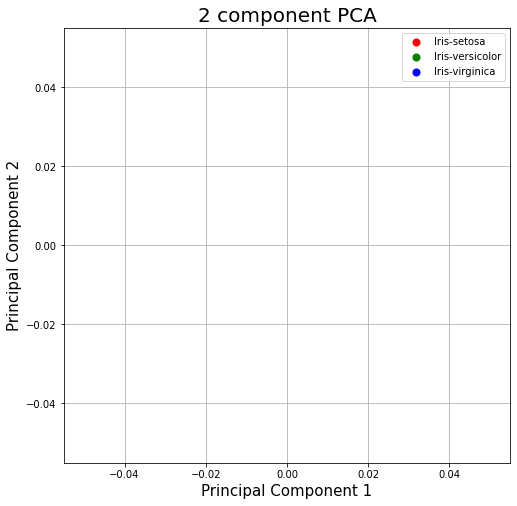

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

作業L2-1
保留執行的結果上傳ipynb檔。
程式必須整理，加上詳細說明確保，他變成你的工具，以後需要時你拿出來看得懂而且會用
使用L1的視覺化資料 來接續上述的視覺化
儘量用不同的顯示方式來做 例如3維也可以
